# `geom_pointdensity()`

Docs:
- https://cran.r-project.org/web/packages/ggpointdensity/refman/ggpointdensity.html
- https://www.rdocumentation.org/packages/ggpointdensity

In [1]:
install.packages("cowplot")
install.packages("ggpointdensity")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(cowplot)
library(ggplot2)
library(ggpointdensity)

In [3]:
options(repr.plot.width = 12, repr.plot.height = 12)

## Iris Example

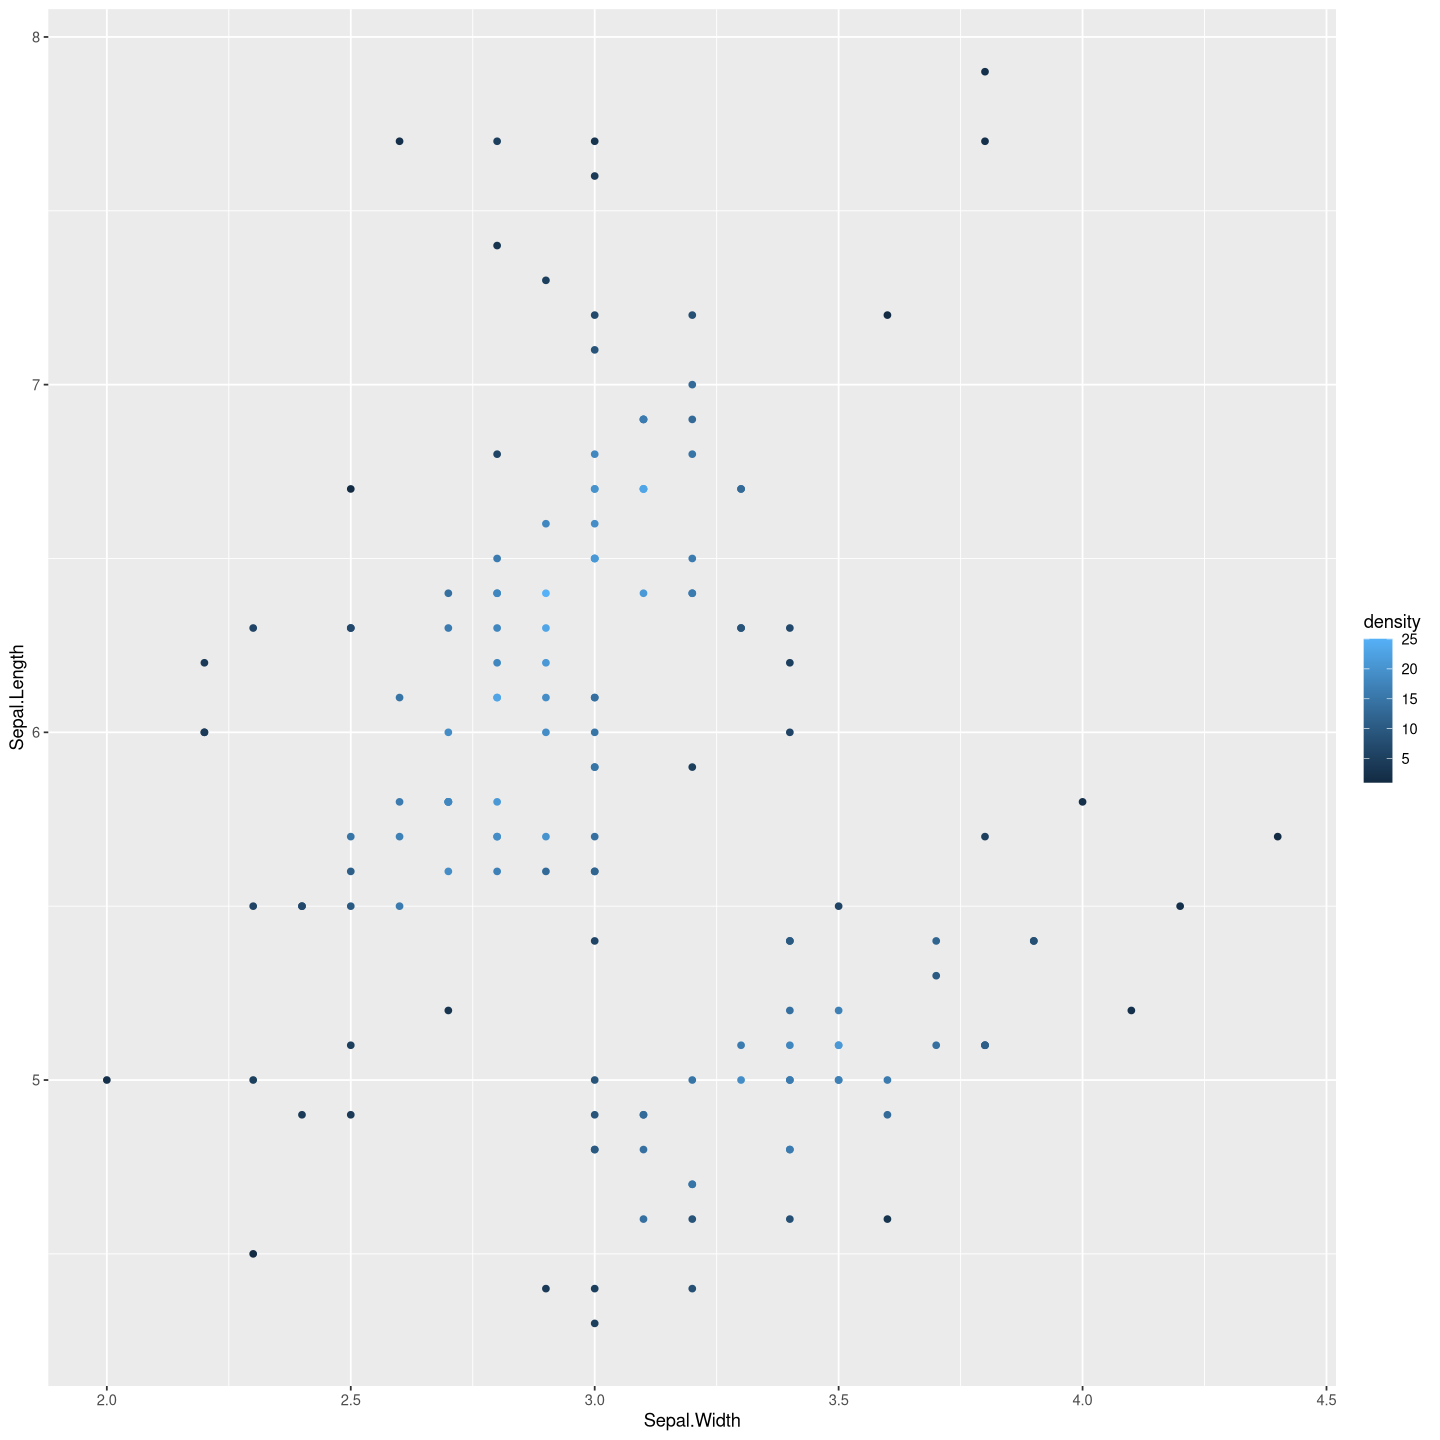

In [4]:
ggplot(iris, aes(Sepal.Width, Sepal.Length)) +
    geom_pointdensity()

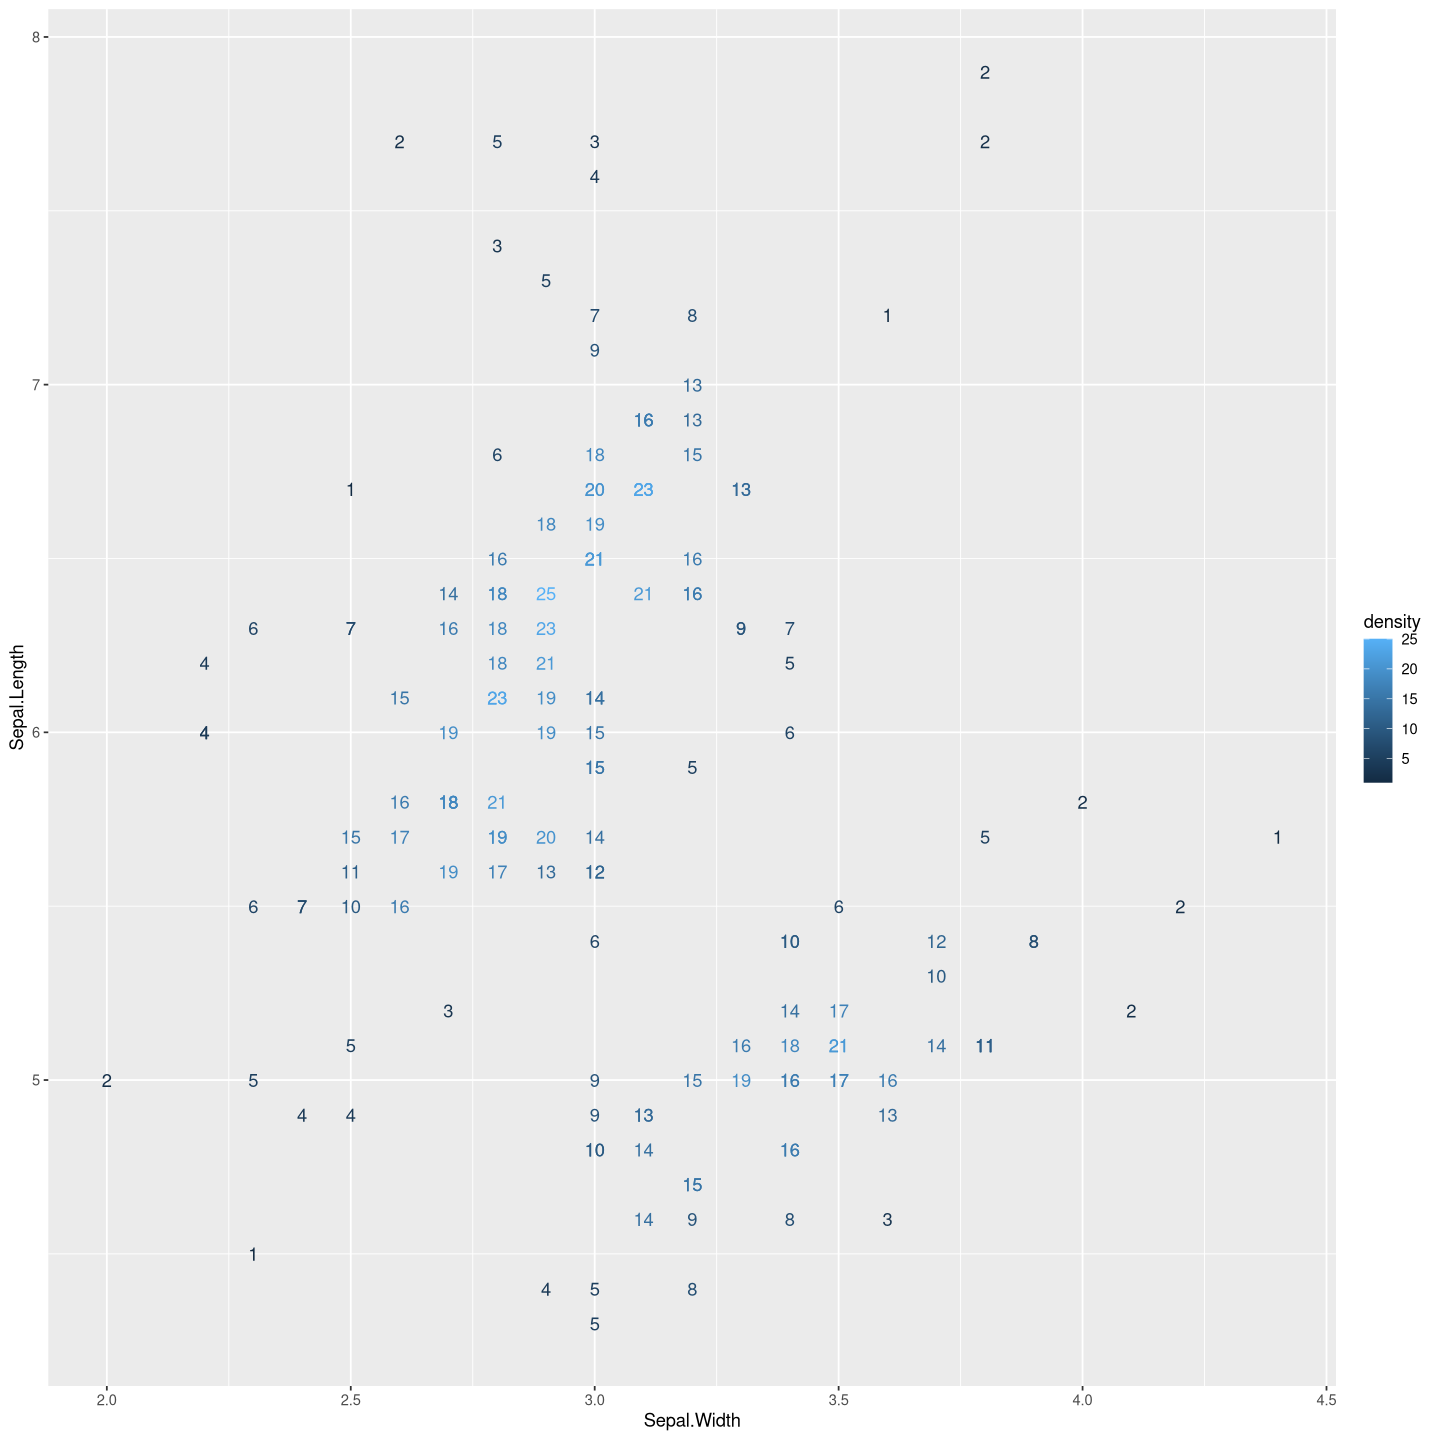

In [5]:
ggplot(iris, aes(Sepal.Width, Sepal.Length)) +
    stat_pointdensity(aes(label = after_stat(density)), geom = "text")

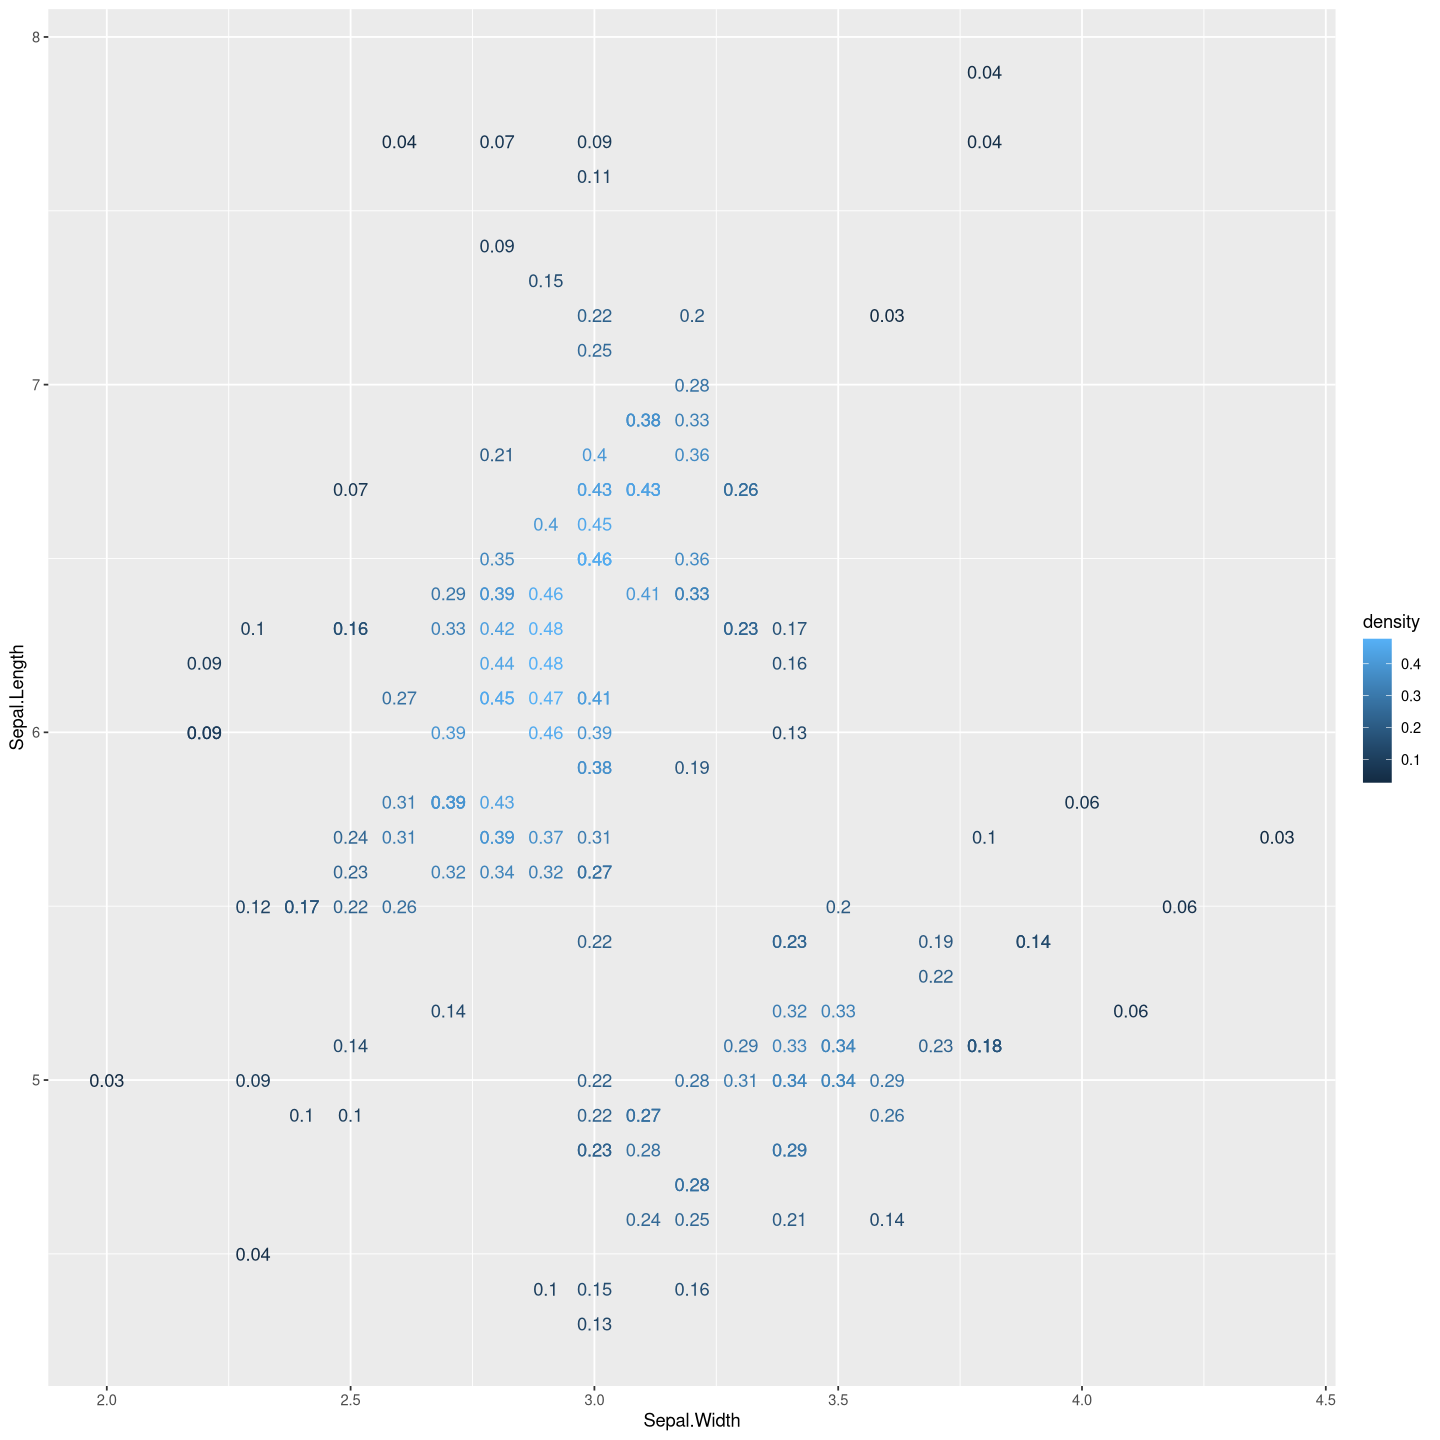

In [6]:
ggplot(iris, aes(Sepal.Width, Sepal.Length)) +
    stat_pointdensity(aes(label = round(after_stat(density), 2)), geom = "text", method = "kde2d")

## Dataset with Clusters

In [7]:
get_data <- function(seed = 42) {
    get_cluster <- function (x, y) {
        data.frame(
            x = rnorm(25, mean = x, sd = 0.25),
            y = rnorm(25, mean = y, sd = 0.25)
        )
    }
    set.seed(seed)
    noise_points <- data.frame(
        x = runif(25, -3, 3),
        y = runif(25, -1, 4)
    )
    data <- rbind(get_cluster(0, 0), get_cluster(2, 2), get_cluster(-2, 2), noise_points)
    rownames(data) <- NULL
    return(data)
}

df <- get_data()
head(df, 3)

,x,y
,<dbl>,<dbl>
1,-0.10761728,0.08048132
2,-0.06431735,-0.19595974
3,-0.44079077,0.39393188


In [8]:
options(repr.plot.width = 16, repr.plot.height = 16)

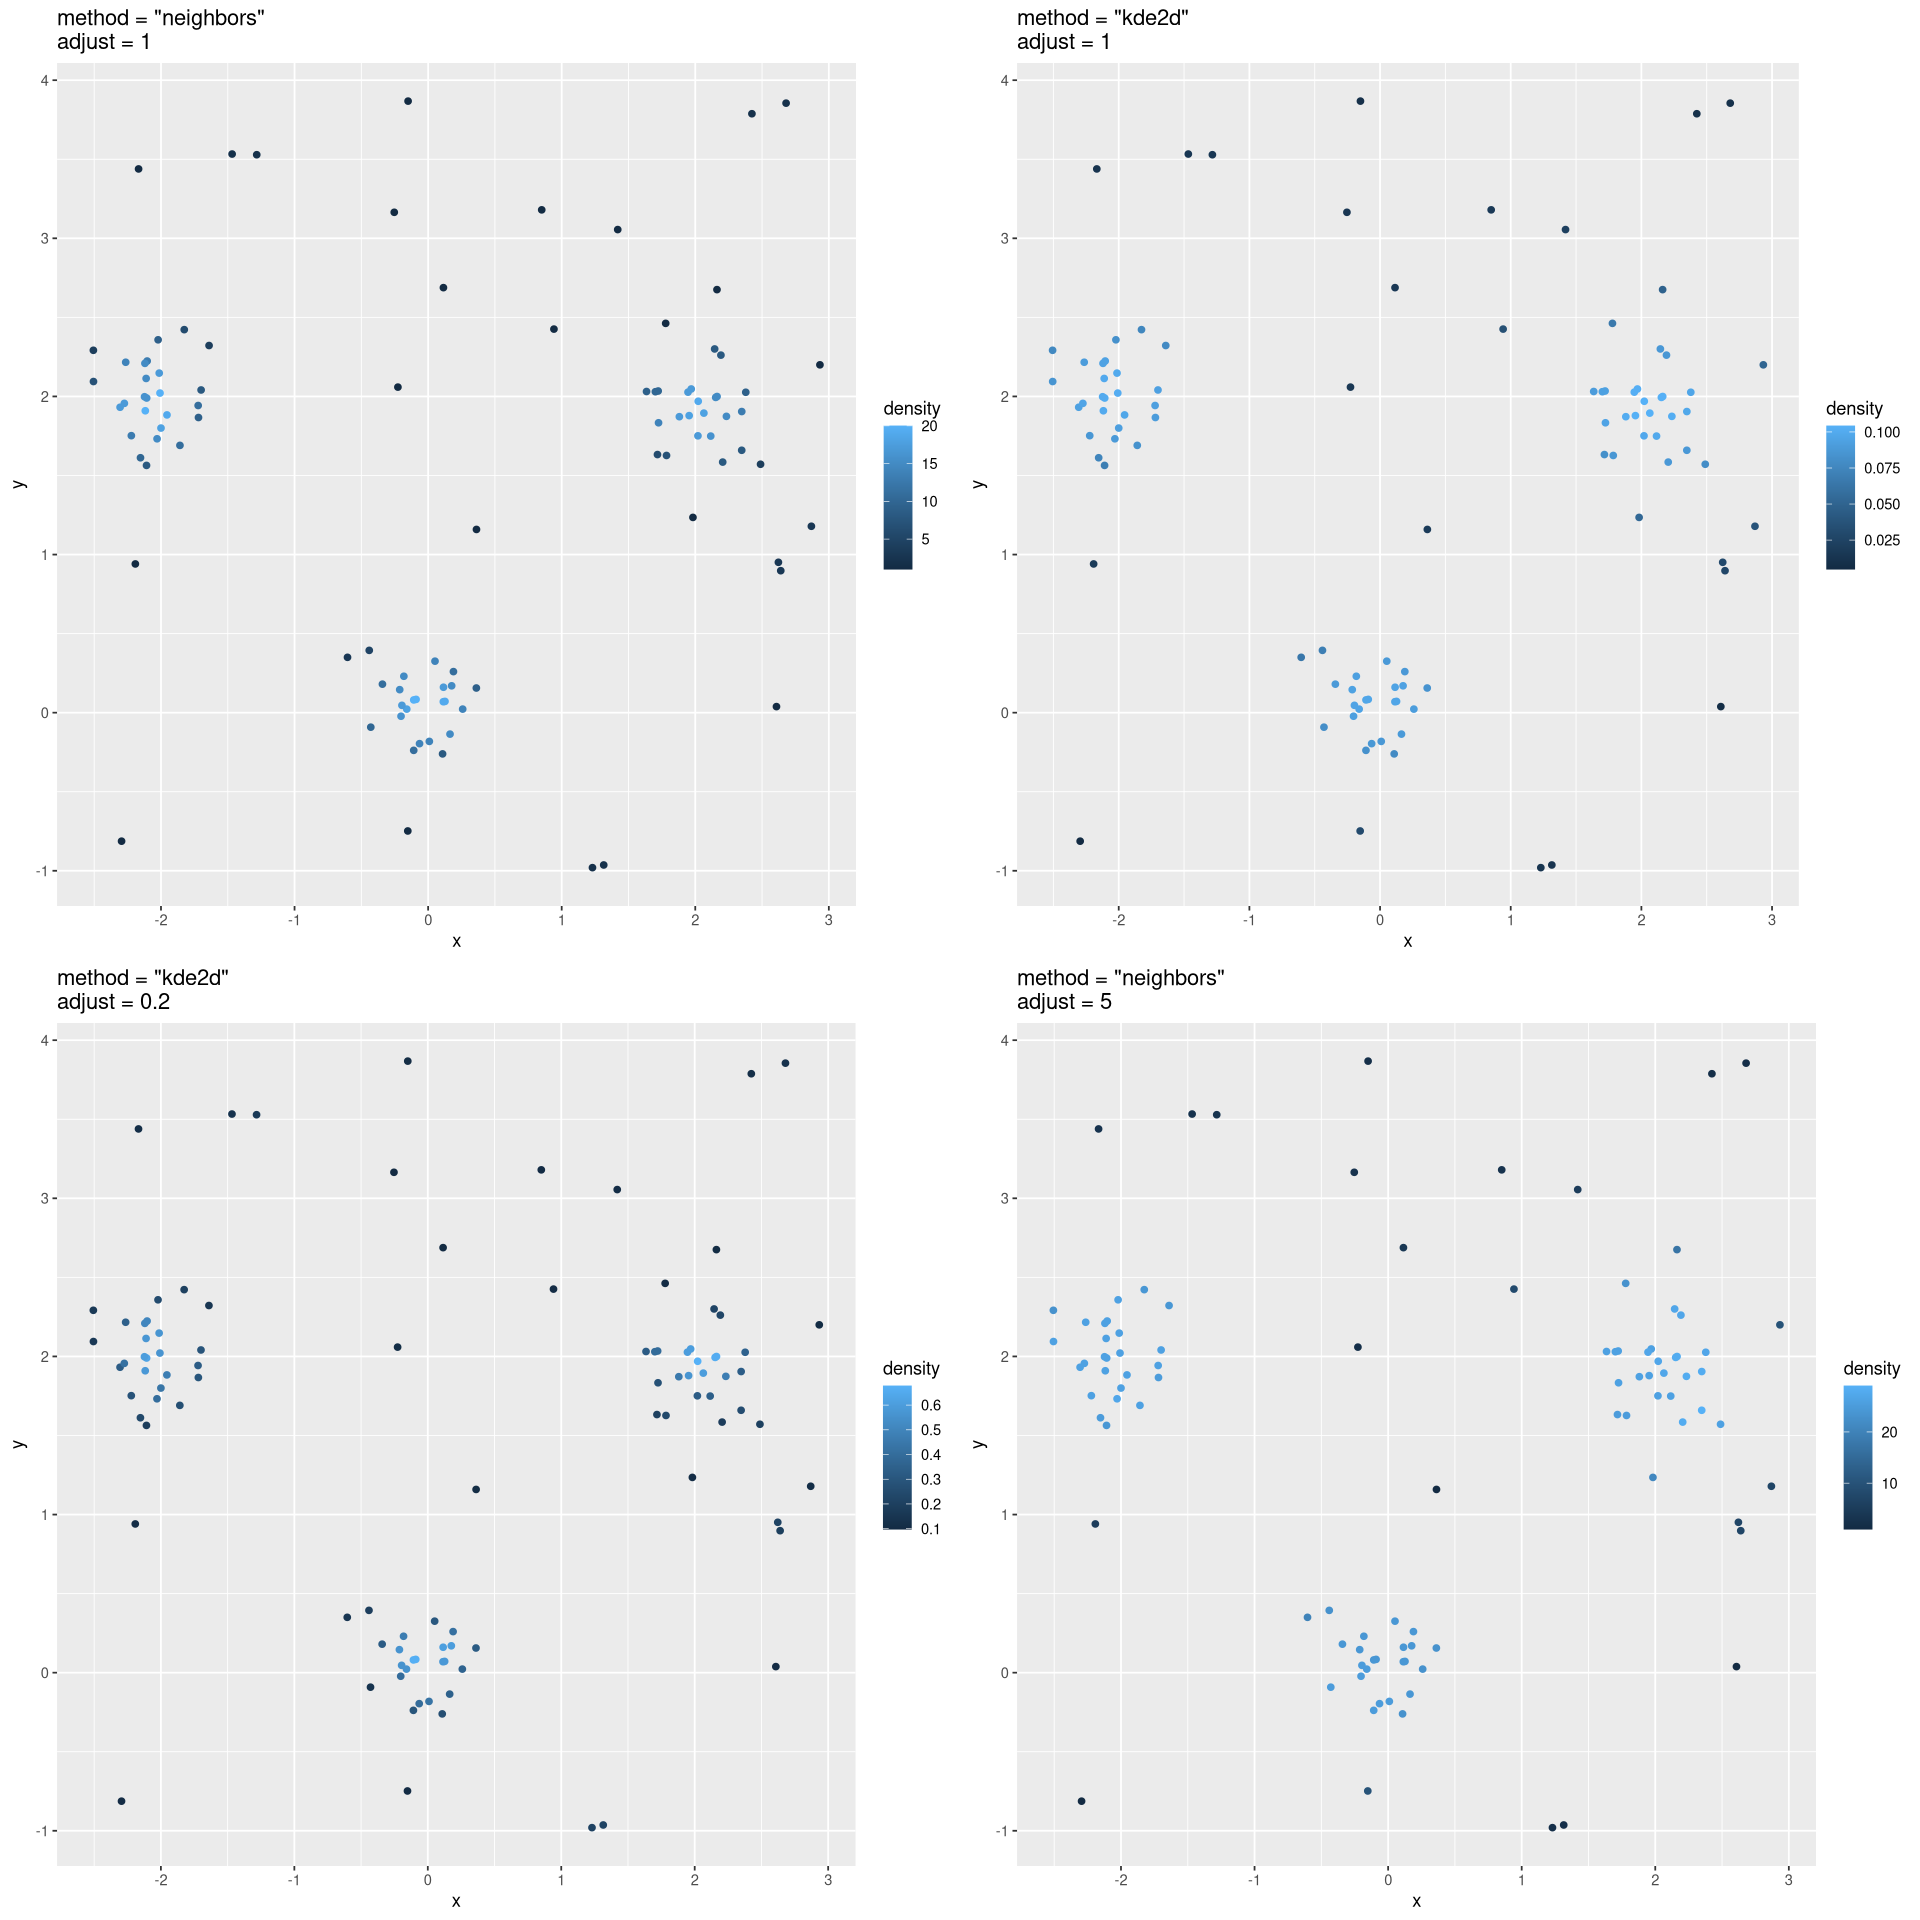

In [9]:
plot_grid(
    ggplot(df, aes(x, y)) +
        geom_pointdensity(method = "neighbors", adjust = 1) +
        ggtitle('method = "neighbors"\nadjust = 1'),
    ggplot(df, aes(x, y)) +
        geom_pointdensity(method = "kde2d", adjust = 1) +
        ggtitle('method = "kde2d"\nadjust = 1'),
    ggplot(df, aes(x, y)) +
        geom_pointdensity(method = "kde2d", adjust = 0.2) +
        ggtitle('method = "kde2d"\nadjust = 0.2'),
    ggplot(df, aes(x, y)) +
        geom_pointdensity(method = "neighbors", adjust = 5) +
        ggtitle('method = "neighbors"\nadjust = 5'),
    ncol = 2
)